In [1]:
import numpy as np

In [2]:
from scipy.stats import invgamma

In [3]:
import matplotlib.pyplot as plt

In [4]:
# https://stats.stackexchange.com/questions/585019/sequential-bayesian-updating-of-mean-and-variance-of-normal-distribution
# https://sites.stat.washington.edu/raftery/Research/PDF/bayescourse.pdf
# https://people.eecs.berkeley.edu/%7Ejordan/courses/260-spring10/lectures/lecture5.pdf
# https://github.com/kamil-dedecius/bml

In [5]:
alpha_0 = 1
beta_0 = 2

In [6]:
# generate data from a normal distribution
mu = 14
sigma = 2

In [7]:
N = 100
data = np.random.normal(mu, sigma, N)

In [8]:
data[np.random.randint(0, data.shape[0], 15)] *=np.random.randint(-3, 3, 15)


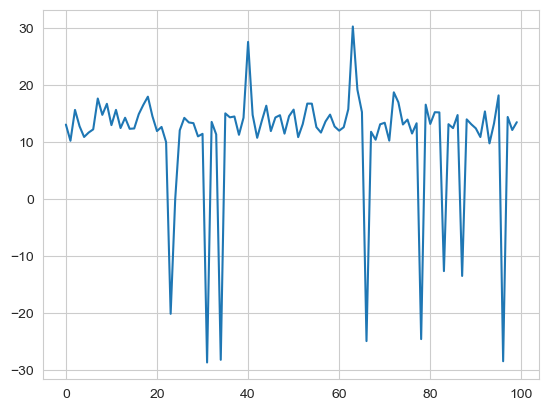

In [9]:
plt.plot(data)

In [10]:
n_0 = 1

In [11]:
alphas: list[float] = [alpha_0]
betas: list[float] = [beta_0]
ns: list[int] = [n_0]
mus: list[float] = [3]

In [12]:
for i in range( N):
    alphas.append(alphas[i-1] + 1/2)
    ns.append(ns[i-1]+ 1)
    betas.append(betas[i-1] + 0.5 *(data[i]-mus[i-1])**2)

    # betas.append(betas[i-1] + 0.5*(data[i]-mus[i-1])**2)
    mus.append(mus[i-1] + 0.5/(ns[i-1]+1) * (data[i-1]-mus[i-1]))
    

In [13]:
sigmas=np.sqrt(np.array([b/(1+a) for b,a in zip(betas, alphas)]))

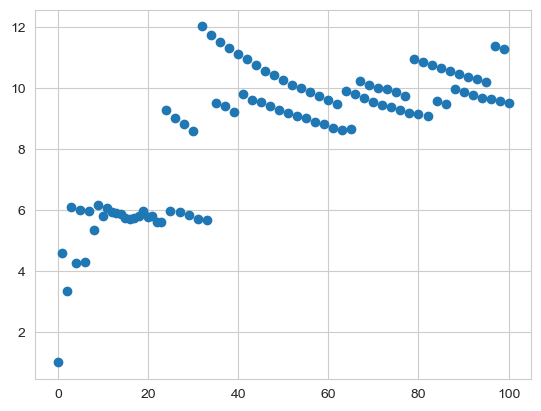

In [14]:
plt.scatter(np.arange(sigmas.shape[0]), sigmas)

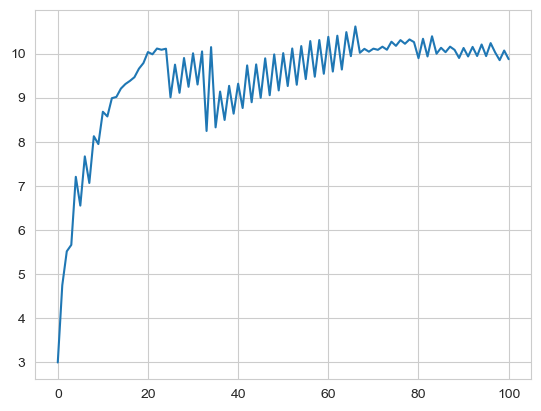

In [15]:
plt.plot(mus)
plt.show()

In [16]:
x = np.linspace(0, 20, 1000)

In [17]:
mu

14

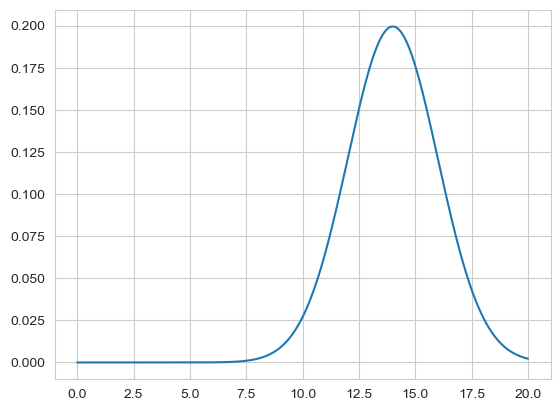

In [18]:
from scipy.stats import norm

plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))

In [19]:
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("paper")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.stats import norm

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, 20)
ax.set_ylim(0, 0.2)
line, = ax.plot([], [], lw=2)
stems, = ax.plot([], [], marker='o', linestyle = 'None', color='red')
stem_sup = np.array(range(12, 30, 3))


# Initialize the line to be empty
def init():
    line.set_data([], [])
    return line,

# Generate the frames for the animation
def update(frame):
    x = np.arange(0, 20)
    y = norm.pdf(x, loc=mus[frame], scale=(sigmas[frame]))
    line.set_data(x, y)
    # p_i = frame**stem_sup * np.exp(-frame) / factorial(stem_sup)
    mu_prob = norm.pdf(mus[frame], loc=mus[frame], scale=(sigmas[frame]))

    stems.set_data(mus[frame], mu_prob )

    ax.set_title(f'Normal Distribution ({mus[frame]:.2f}, {sigmas[frame]:.2f})'.format(frame))
    return line,

# Create the animation
frames = range(0, 100, 1)  # Lambda values for each frame
ani = animation.FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

# Display the animation
plt.close()

In [20]:
ani.save('./out/normal.gif', writer='imagemagick', fps=10);

/tmp/ipykernel_29990/1421820415.py:33: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  stems.set_data(mus[frame], mu_prob )


In [21]:
from IPython.display import Image
(Image(url='./out/normal.gif'))

In [22]:
data2 = data.copy()

In [24]:
mus = np.array(mus)

In [46]:
anomaly_index = np.where((data2 > mus[1:] + 3*sigmas[1:]) | (data2 < mus[1:] - 3*sigmas[1:]))
len(anomaly_index[0])

6

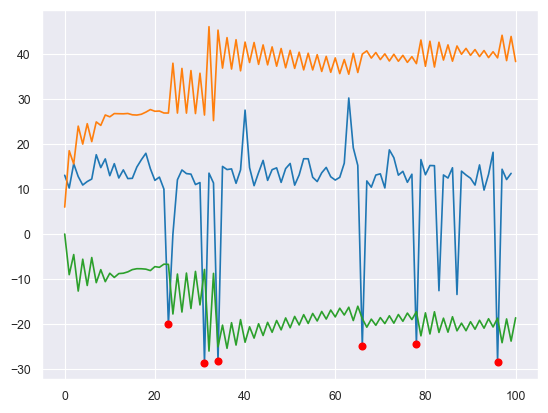

In [40]:
plt.plot(data2)
plt.plot(mus + 3*sigmas)
plt.plot(mus - 3*sigmas)
plt.plot(anomaly_index[0], data2[anomaly_index], color='r', marker='o', linestyle='')

In [41]:
from traced_v2.models.normal import NormalModel

In [42]:
model = NormalModel("src", "dest", sigma_factor=3, gamma=0.5, alpha_0=1, beta_0=1, mu_0=12)
for i, x in enumerate(data2):
    model.log(16000000+i*1000000, x)

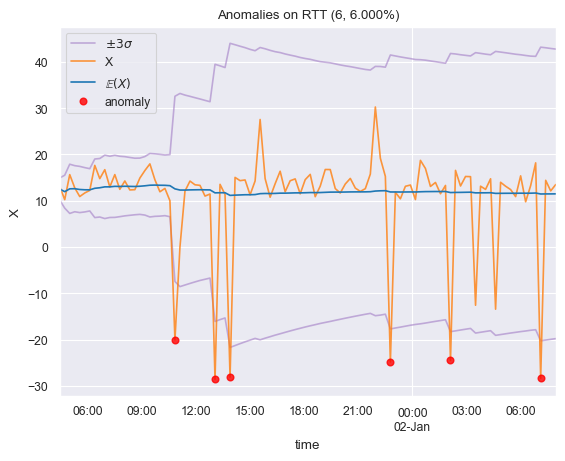

In [43]:
model.plot()